In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path =['band1.gif','band2.gif','band3.gif','band4.gif']

In [3]:
data=np.zeros((512,512,4))
for i in range(4):
    data[:,:,i]=plt.imread(image_path[i])[:,:,0]
    
    

In [4]:
data=data.reshape(512*512,4)

In [5]:
class KMean:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    def fit_predict(self,data):
        self.centroids = data[np.random.choice(range(0,data.shape[0]),self.n_clusters,replace=False)]
        for i in range(self.max_iter):
            cluster_label=self.clustersassign(data)
            new_centroids=self.move_centroids(data,cluster_label)
            if (self.centroids==new_centroids).all():
                break
            else:
                self.centroids=new_centroids
        return cluster_label        
        
    def clustersassign(self,data):
        distances =np.zeros((data.shape[0],self.n_clusters))
        for i in range(self.centroids.shape[0]):
            distances[:,i]=np.sqrt(np.sum((data-self.centroids[i])**2,axis=1))
        claster=np.argmin(distances,axis=1)    
        return claster
    def move_centroids(self,data,cluster):
        new_centroids =np.zeros((self.n_clusters,data.shape[1]))
        cluster_type = np.unique(cluster)
        for i in cluster_type:
            new_centroids[i]=np.mean(data[cluster == i],axis=0)
        return new_centroids
            

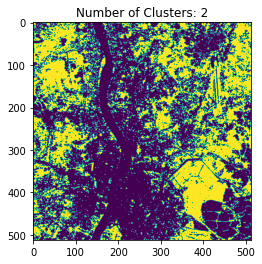

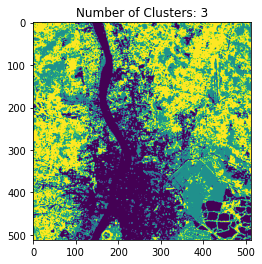

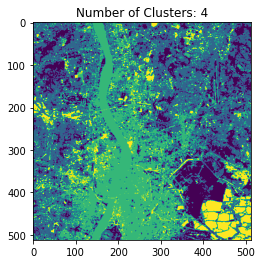

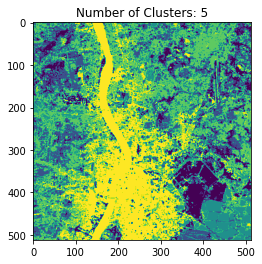

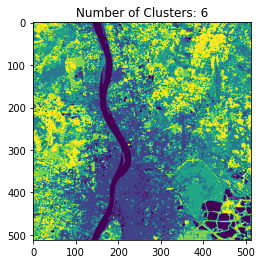

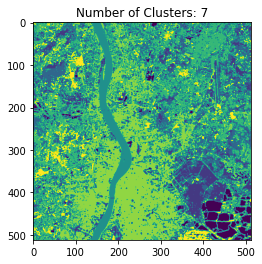

In [6]:
for i in range(2,8):
    kmeans = KMean(i,300)  
    cluster_labels= kmeans.fit_predict(data)
    clustered_image = cluster_labels.reshape(512,512)
    plt.imshow(clustered_image, cmap='viridis')
    plt.title(f'Number of Clusters: {i}')
    plt.show()